# ECON526: Quantitative Economics with Data Science Applications

Applications of Linear Algebra

Jesse Perla

# Overview

## Motivation and Materials

-   In this lecture, we will cover some applications of the tools we
    developed in the previous lecture

-   The goal is to build some useful tools to sharpen your intuition on
    linear algebra and eigenvalues/eigenvectors, and practice some basic
    coding

-   We introduce [scikit-learn](https://scikit-learn.org/stable/), a
    package for old-school (i.e. not deep learning or neural networks)
    ML and data analysis

    -   Introduces “unsupervised learning” (i.e., tools to interpret
        data structure without any forecasts/predictions)

-   Some additional material and references

    -   [QuantEcon
        Python](https://python.quantecon.org/linear_algebra.html)
    -   [QuantEcon
        DataScience](https://datascience.quantecon.org/scientific/applied_linalg.html)
    -   [A First Course in Quantitative Economics with
        Python](https://intro.quantecon.org/)

## Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from numpy.linalg import cond, matrix_rank, norm
from scipy.linalg import inv, solve, det, eig, lu, eigvals
from scipy.linalg import solve_triangular, eigvalsh, cholesky

## New Packages for Data Science and ML

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Difference Equations

## Linear Difference Equations as Iterative Maps

-   Consider $A : \mathbb{R}^N \to \mathbb{R}^N$ as the linear map for
    the state $x_t \in \mathbb{R}^N$
-   An example of a linear difference equation is $$
    x_{t+1} = A x_t
    $$ where

$$
A \equiv \begin{bmatrix}
0.9 & 0.1 \\
0.5 & 0.8 \\
\end{bmatrix}
$$

In [4]:
A = np.array([[0.9, 0.1], [0.5, 0.8]])
x_0 = np.array([1, 1])
x_1 = A @ x_0
print(f"x_1 = {x_1}, x_2 = {A @ x_1}")

x_1 = [1.  1.3], x_2 = [1.03 1.54]

## Iterating with $\rho(A) > 1$

Iterate $x_{t+1} = A x_t$ from $x_0$ for $t=100$

In [5]:
x_0 = np.array([1, 1])
t = 200
print(f"rho(A) = {np.max(np.abs(eigvals(A)))}")
print(f"x_{t} = {np.linalg.matrix_power(A, t) @ x_0}")

rho(A) = 1.079128784747792
x_200 = [3406689.32410673 6102361.18640516]

-   Diverges to
    $x_{\infty} = \begin{bmatrix} \infty & \infty \end{bmatrix}^T$
-   $\rho = 1 + 0.079$ says in the worst case (i.e., $x_t \propto$ the
    eigenvector associated with $\lambda = 1.079$ eigenvalue), expands
    by $7.9\%$ on each iteration

## Iterating with $\rho(A) < 1$

In [6]:
A = np.array([[0.6, 0.1], [0.5, 0.8]])
print(f"rho(A) = {np.max(np.abs(eigvals(A)))}")
print(f"x_{t} = {np.linalg.matrix_power(A, t) @ x_0}")

rho(A) = 0.9449489742783178
x_200 = [6.03450418e-06 2.08159603e-05]

-   Converges to $x_{\infty} = \begin{bmatrix} 0 & 0 \end{bmatrix}^T$

## Iterating with $\rho(A) = 1$

-   To make a matrix that has $\rho(A) = 1$ reverse eigendecomposition!
-   Leave previous eigenvectors in $Q$, change $\Lambda$ to force
    $\rho(A)$ directly

In [7]:
Q = np.array([[-0.85065081, -0.52573111], [0.52573111, -0.85065081]])
print(f"check orthogonal: dot(x_1,x_2) approx 0: {np.dot(Q[:,0], Q[:,1])}")
Lambda = [1.0, 0.8]  # choosing eigenvalue so max_n|lambda_n| = 1
A = Q @ np.diag(Lambda) @ inv(Q)
print(f"rho(A) = {np.max(np.abs(eigvals(A)))}")
print(f"x_{t} = {np.linalg.matrix_power(A, t) @ x_0}")

check orthogonal: dot(x_1,x_2) approx 0: -1.9275984594779062e-17
rho(A) = 1.0
x_200 = [ 0.27639321 -0.17082039]

# Unemployment Dynamics

## Dynamics of Employment without Population Growth

-   Consider an economy where in a given year $\alpha = 5\%$ of employed
    workers lose job and $\phi = 10\%$ of unemployed workers find a job
-   We start with $E_0 = 900,000$ employed workers, $U_0 = 100,000$
    unemployed workers, and no birth or death. Dynamics for the year:

$$
\begin{aligned}
E_{t+1} &= (1-\alpha) E_t + \phi U_t\\
U_{t+1} &= \alpha E_t + (1-\phi) U_t
\end{aligned}
$$

-   Can write this as a matrix equation

$$
\underbrace{\begin{bmatrix} E_{t+1}\\U_{t+1}\end{bmatrix}}_{X_{t+1}} = \underbrace{\begin{bmatrix} 1-\alpha & \phi \\ \alpha & 1-\phi \end{bmatrix}}_{ A} \underbrace{\begin{bmatrix} E_{t}\\U_{t}\end{bmatrix}}_{X_t}
$$

## Simulating

Simulate by iterating $X_{t+1} = A X_t$ from $X_0$ until $T=100$

In [8]:
def simulate(A, X_0, T):
    X = np.zeros((2, T+1))
    X[:,0] = X_0
    for t in range(T):
        X[:,t+1] = A @ X[:,t]
    return X
X_0 = np.array([900000, 100000])
A = np.array([[0.95, 0.1], [0.05, 0.9]])
T = 100
X = simulate(A, X_0, T)
print(f"X_{T} = {X[:,T]}")

X_100 = [666666.6870779  333333.31292209]

## Plotting Code

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(T+1), X.T, label=["Employed", "Unemployed"])
ax.set(xlabel="t", ylabel="Number of Workers", title="Employment Status")
ax.legend()
plt.show()

## Dynamics of Unemployment

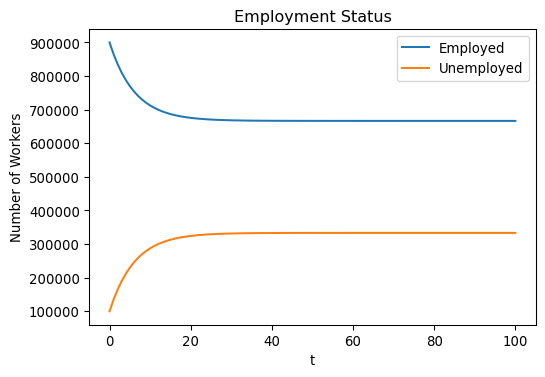

## Convergence to a Longrun Distribution

-   Find $X_{\infty}$ by iterating $X_{t+1} = A X_t$ many times from a
    $X_0$?

    -   Check if it has converged with $X_{\infty} \approx A X_{\infty}$
    -   Is $X_{\infty}$ the same from any $X_0$? Will discuss
        “ergodicity” later

-   Alternatively, note that this expression is the same as

    $$
    1 \times \bar{X} = A \bar{X}
    $$

    -   i.e, a $\lambda = 1$ where $\bar{X}$ is the corresponding
        eigenvector of $A$
    -   Is $\lambda = 1$ always an eigenvalue? (yes if all
        $\sum_{n=1}^N A_{ni} = 1$ for all $i$)
    -   Does $\bar{X} = X_{\infty}$? For any $X_0$?
    -   Multiple eigenvalues with $\lambda = 1 \implies$ multiple
        $\bar{X}$

## Using the First Eigenvector for the Steady State

In [11]:
Lambda, Q = eig(A)
print(f"real eigenvalues = {np.real(Lambda)}")
print(f"eigenvectors are column-by-column in Q =\n{Q}")
print(f"first eigenvalue = 1? {np.isclose(Lambda[0], 1.0)}")
X_bar = Q[:,0] / np.sum(Q[:,0]) * np.sum(X_0)
print(f"X_bar = {X_bar}\nX_{T} = {X[:,T]}")

real eigenvalues = [1.   0.85]
eigenvectors are column-by-column in Q =
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
first eigenvalue = 1? True
X_bar = [666666.66666667 333333.33333333]
X_100 = [666666.6870779  333333.31292209]

## Using the Second Eigenvalue for the Convergence Speed

-   The second largest ($\lambda_2 < 1$) provides information on the
    speed of convergence
    -   $0$ is instantaneous convergence here
    -   $1$ is no convergence here
-   Create a new matrix with the same steady state, different speed

In [12]:
Lambda_fast = np.array([1.0, 0.5])
A_fast = Q @ np.diag(Lambda_fast) @ inv(Q) # same eigenvectors
X_fast = simulate(A_fast, X_0, T)
print(f"X_{T} = {X_fast[:,T]}")

X_100 = [666666.66666667 333333.33333334]

## Dynamics of Unemployment For Difference Convergence Speeds

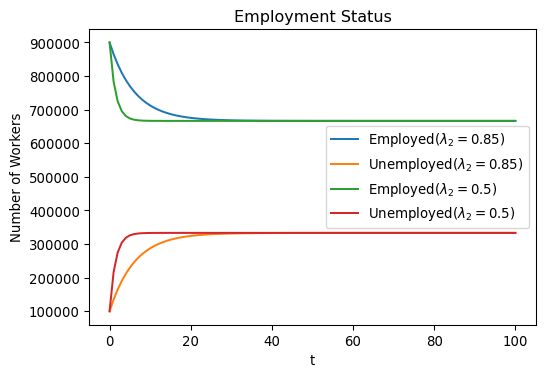

# Latent Variables

## Features, Labels, and Latents

-   Data science and ML often use different terminology than economists:
    -   **Features** are economists **explanatory or independent
        variables**. They have the key source of variation to make
        predictions and conduct counterfactuals
    -   **Labels** correspond to economists **observables or dependent
        variables**
    -   **Latent Variables** are **unobserved variables**, typically
        sources of heterogeneity or which may drive both the dependent
        and independent variables
-   Economists will use theory and experience to transform data (i.e.,
    what ML people call “feature engineering”) for better explanatory
    power or map to theoretical models
-   ML refers to methods using only **features** as **unsupervised
    learning**. The structure of the underlying data can teach you about
    its data generating process
-   Key: uncover and interpret latent variables using statistics coupled
    with assumptions from economic theory. There is theory beyond all
    interpretation

## Principle Components and Factor Analysis

-   Another application of eigenvalues is dimension reduction, which
    simplifies **features** by uncovering **latent** variables.
    Unsupervised
-   One technique is Principle Components Analysis (PCA) which uncovers
    latent variables that capture the primary directions of variation in
    the underlying data
    -   May allow mapping data into a lower-dimensional, uncorrelated
        set of features
    -   Often uses Singular Value Decomposition (SVD) - a numerically
        stable generalization of eigendecomposition to non-square
        matrices.See [QuantEcon SVD
        Notes](https://python.quantecon.org/svd_intro.html#application-principal-components-analysis-pca)
    -   One of many methods. Many algorithms in ML and econometrics have
        similar goals but can be non-linear
-   Given a matrix $X \in \mathbb{R}^{N \times M}$, can we find a
    lower-dimensional representation $Z \in \mathbb{R}^{N \times L}$ for
    $L < M$ that captures the most variation in $X$?
-   The columns of $Z$ are called the principle components of $X$
-   The goal is to invert the $X$ data to find the $Z$—and provide a
    mapping to reduce the dimensionality for future data

## Decomposing the Data

PCA typically uses SVD in practice - but we will use eigendecomposition
(aka spectral decomposition if symmetric) instead

Start by doing a decomposition of the “covariance matrix” of the data,
$X X^T$, and form diagonal $\Lambda$ as a product of vectors
$\sigma\in\mathbb{R}^N$ (the singular values)

$$
X X^T = Q \Lambda Q^T = \underbrace{Q \sigma}_{X} \underbrace{\sigma^T Q^T}_{(Q \sigma)^T = X^T},\quad \text{where } \Lambda \equiv \sigma \sigma^T
$$

Hence, denoting the $n$th column of $Q$ as $Q_n$, we have

$$
X = Q \sigma = Q_1 \sigma_1 + Q_2 \sigma_2 + \ldots + Q_M \sigma_M
$$

## Dimension Reduction

-   Assume we sorted so
    $\sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_M$. Frequently
    $\sigma_1 \gg \sigma_M$
-   For many problems, the $\sigma_m$ decay quickly, so we can
    approximate $X$ with fewer terms by truncating the sum at $L < M$.

$$
X \approx Q_1 \sigma_1 + Q_2 \sigma_2 + \ldots + Q_L \sigma_L
$$

-   The eigendecomposition (or SVD) can find the orthogonal directions
    of the data that capture the most variation in the covariance matrix
    -   Can prove it is the solution to the optimization problem to
        explain the most variation in the data with the lowest
        dimensionality
-   This is useful even if it is not necessary to reduce the
    dimensionality of the data
    -   Many high-dimensional data sources are low-dimensional in the
        suitable space.
    -   This is especially true when models allow for nonlinear
        transformations (e.g., neural networks, autoencoders, etc.)

## Creating a Dataset with Latent Factors

Create a dataset with two latent factors, the first dominating

In [14]:
N = 50 # number of observations
L, M = 2, 3 # number of latent and observed factors
Z = np.random.randn(N, L) # latent factors
F = np.array([[1.0, 0.05], # X_1 = Z_1 + 0.05 Z_2
              [2.0, 0.0], # X_2 = 2 Z_1
              [3.0, 0.1]]) # X_3 = 3 Z_1 + 0.1 Z_2
X = Z @ F.T + 0.1 * np.random.randn(N, M) # added noise

## PCA without any Dimension Reduction

-   See [QuantEcon SVD](https://python.quantecon.org/svd_intro.html) for
    coding yourself. We will use the
    [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
    package
-   The explained variance is the fraction of the variance explained by
    each factor

In [15]:
pca = PCA(n_components=3)
pca.fit(X)
with np.printoptions(precision=4, suppress=True, threshold=5):
  print(f"Singular Values (sqrt eigenvalues):\n{pca.singular_values_}")
  print(f"Explained Variance (ordered):\n{pca.explained_variance_ratio_}")

Singular Values (sqrt eigenvalues):
[28.3186  0.8115  0.693 ]
Explained Variance (ordered):
[0.9986 0.0008 0.0006]

## Dimension Reduction with PCA

In [16]:
pca = PCA(n_components=2) # one less, and correctly specified
Z_hat = pca.fit_transform(X) # transformed by dropping last factor 
# Scale and sign may not match due to indeterminacy
print(f"Correlation of Z_1 to Z_hat_1 = {np.corrcoef(Z.T, Z_hat.T)[0,2]}")
print(f"Correlation of Z_2 to Z_hat_2 = {np.corrcoef(Z.T, Z_hat.T)[1,3]}")

Correlation of Z_1 to Z_hat_1 = 0.9994272549185976
Correlation of Z_2 to Z_hat_2 = 0.5498563998689757

## Interpreting the Results

-   The first factor in the decomposition is nearly perfectly (positive
    or negatively) correlated with the more important latent factor
    -   The sign could have gone either way. The key is the shared
        information
    -   How could you have known the sign is indeterminate?
-   The 2nd factor has a good but not great correlation with the 2nd
    latent. Why?
-   The variance decomposition that gave a 3rd factor with non-zero
    variance
    -   In our process, there are only two latent variables. Why didn’t
        it figure it out?
-   How could you have changed the DGP to make this **less** successful?

# Present Discounted Values

## Geometric Series

-   Assume dividends follow $y_{t+1} = G y_t$ for $t=0,1,\ldots$ and
    $y_0$ is given

-   $G > 0$, dividends are discounted at factor $\beta > 1$ then
    $p_t = \sum_{s=0}^{\infty} \beta^s y_{t+s} = \frac{y_t}{1-\beta G}$

-   More generally if $x_{t+1} = A x_t$, $x_t \in \mathbb{R}^N$,
    $y_t = G x_t$ and $A \in \mathbb{R}^{N \times N}$, then

    $$
    \begin{aligned}
    p_t &= y_t + \beta y_{t+1} + \beta^2 y_{t+2} + \ldots = G x_t + \beta G A x_t + \beta G A A  x_t + \ldots\\
    &= \sum_{s=0}^{\infty} \beta^s A^s y_t\\
    &= G (I - \beta A)^{-1} x_t\quad,\text{ if } \rho(A) < 1/\beta
    \end{aligned}
    $$

-   i.e., spectral radius of $A$, the maximum scaling, must be less than
    discounting

-   Intuition from univariate: of $G \in \mathbb{R}^{1 \times 1}$ then
    $\text{eig}(G) = G$, so must have $|\beta G| < 1$

## PDV Example

Here is an example with $1 < \rho(A) < 1/\beta$. Try with different $A$

In [17]:
beta = 0.9
A = np.array([[0.85, 0.1], [0.2, 0.9]])
G = np.array([[1.0, 1.0]]) # row vector
x_0 = np.array([1.0, 1.0])
p_t = G @ solve(np.eye(2) - beta * A, x_0)
#p_t = G @ inv(np.eye(2) - beta * A) @ x_0 # alternative
rho_A = np.max(np.abs(np.real(eigvals(A))))
print(f"p_t = {p_t[0]:.4g}, spectral radius = {rho_A:.4g}, 1/beta = {1/beta:.4g}")

p_t = 24.43, spectral radius = 1.019, 1/beta = 1.111

## A Portfolio Example

-   Two assets pay dividends
    $d_t \equiv \begin{bmatrix} d_{1t} & d_{2t} \end{bmatrix}^T$
    following $d_{t+1} = A\, d_t$ from $d_0$
-   Porfolio has $G \equiv \begin{bmatrix} G_1 & G_2 \end{bmatrix}$
    shares of each asset and you discount at rate $\beta$

In [18]:
A = np.array([[0.6619469, 0.49646018],[0.5840708, 0.4380531]])
G = np.array([[10.0, 4.0]])       
d_0 = np.array([1.0, 1.0])
T, beta = 10, 0.9
p_0 = G @ solve(np.eye(2) - beta * A, d_0)
d = simulate(A, d_0, T)
y = G @ d # total dividends from portfolio
print(f"Portfolio value at t=0 is {p_0[0]:.5g}, total dividends at time {T} is {y[0,T]:.5g}")

Portfolio value at t=0 is 1424.5, total dividends at time 10 is 36.955

## Dividends Seem to Grow at a Similar Rate?

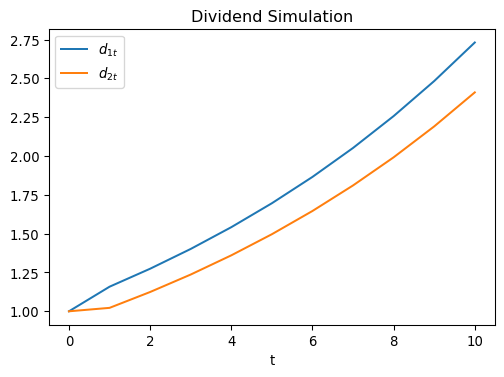

## Digging Deeper

-   Let’s do an eigendecomposition to analyze the factors

In [20]:
Lambda, Q = eig(A)
print(np.real(Lambda))

[ 1.10000000e+00 -2.65486732e-09]

-   The first eigenvector is 1.1, but the second is (numerically) zero!
    -   (In fact, I rigged it to be zero by constructing from a
        $\Lambda$, so this is all numerical copy/paste errors)
-   Suggests that maybe only one latent factor driving both $d_{1t}$ and
    $d_{2t}$?

## Evolution Matrix is Very Simple with $\lambda_2 = 0$

If we stack columns $Q \equiv \begin {bmatrix} q_1 & q_2 \end{bmatrix}$
then, $$
A = Q \Lambda Q^{-1} = Q \begin{bmatrix} \lambda_1 & 0 \\ 0 & 0 \end{bmatrix} Q^{-1} = \lambda_1 q_1  q_1^{-1}
$$

In [21]:
lambda_1 = np.real(Lambda[0])
q_1 = np.reshape(Q[:,0], (2,1))
q_1_inv = np.reshape(inv(Q)[0,:], (1,2))
norm(A - lambda_1 * q_1 @ q_1_inv) # pretty close to zero!

2.663274500543771e-09

## Transforming to the Latent State

-   Recall: $A = Q \Lambda Q^{-1}$ can be interpreted as:
    -   Transformation to latent space, scaling, transform back
-   We can demonstrate this in our example:
    -   Transforming $d_0$ to $\ell_0$ using $q_1^{-1}$
    -   Evolving $\ell_t$ from $\ell_0$ with
        $\ell_{t+1} = \lambda_1 \ell_t$, or
        $\ell_t = \lambda_1^t \ell_0$
    -   Transforming back with $q_1$
    -   Checking if it aligns with the $d_t$

## Implementation

In [22]:
l_0 = lambda_1 * q_1_inv @ d_0 # latent space
l = l_0 * np.power(lambda_1, np.arange(0, T)) # powers
d_hat = q_1 * l # back to original space
# Missing d_0 since doing A * d_0 iterations
print(f"norm = {norm(d[:,1:] - d_hat)}")
y_hat = G @ d_hat

norm = 2.3494410877755447e-10

Let’s see if these line up perfectly

## Total Dividends and the Latent Variable

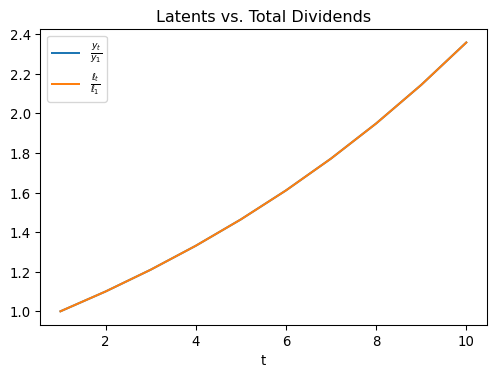

# Discrete Latent Variables

## Clustering and Discrete Latent Variables

-   PCA was a way to uncover continuous latent variables, or find
    low-dimensional continuous approximations
-   But latent variables may be discrete (e.g., types of people, firms)
-   Hidden discrete variables require assigning observations to groups
-   Clustering lets you take a set of observations with (potentially)
    variables (i.e., features) and try to assign a discrete latent
    variable to each observation
    -   Sometimes we know the number of groups from theory, usually we
        do not
    -   While some are statistical and probabilistic, most methods
        assign a single latent type rather than a distribution
    -   Choosing the number of groups to assign to is a challenge that
        requires theory and regularization - which we will avoid here
    -   Instead, just as with PCA we will choose the number of groups
        ad-hoc rather than in a disciplined way

## Partitioning Sets

-   Let $X\in\mathbb{R}^{N\times M}$ with
    $x_1,\ldots x_N\in\mathbb{R}^M$ the individual observations
-   Assume that each $x_n$ has a latent discrete $k \in \{1, \ldots K\}$
    then we can assign each observation to one group
    -   $\mathbf{S} \equiv \{S_1, \ldots, S_K\}$ where each
        $n=1,\ldots N$ is in exactly one $S_k$ (i.e. a partition)
-   The goal is to find the partition which is the most likely to assign
    each $x_n$ the correct latent variable $k$
-   An alternative interpretation is to think of this as a dimension
    reduction technique which reduces complicated data into a
    low-dimensional discrete variable
-   In economics we will sometimes cluster on some observations to
    reduce the dimension, then leave others continuous

## k-means Clustering

-   If theory suggests that $n\in S_k$ with similar latent variables
    should have similar $x_n$

    -   Group observations which are close or similar to each other
    -   As always in linear algebra, close suggests using a norm. The
        euclidean norm in the $M$ dimensional feature space is a good
        baseline

-   The objective of k-means is to choose the partition $\mathbf{S}$
    which minimizes the norm between observations within each group
    (normalized by group size $|S_k|$):

    $$
    \min_{\mathbf{S}} \sum_{k=1}^K \frac{1}{|S_k|}\sum_{x_n, x_{n'} \in S_k} ||x_n - x_{n'}||_2^2
    $$

-   Using standard euclidean norm between two elements in $S_k$ $$
    ||x_n - x_{n'}||_2^2 = \sum_{m=1}^M (x_{nm} - x_{n'm})^2
    $$

## k-means Objective Function

-   Can prove that the previous objective is equivalent to minimizing
    the sum of the squared distances from the group $k$’s mean

    $$
    \min_{\mathbf{S}} \sum_{k=1}^K \sum_{n \in S_k} ||x_n - \bar{x}_k||_2^2
    $$

-   Where the mean of group $k$ is standard, and across all $m$ features

    $$
    \bar{x}_k \equiv \frac{1}{|S_k|}\sum_{x_n \in S_k} x_n
    $$

-   Careful with using wildly different scales (i.e. $\bar{x}_k$ may be
    dominated by one feature)

## Generating Data with Latent Groups

Generate data with 2 features and 2 latent groups and see how k-means
does

In [24]:
mu_1 = np.array([0.0, 0.0]) # mean of k=1
mu_2 = np.array([1.0, 1.0]) # mean of k=2
sigma = np.array([[0.2, 0], [0, 0.2]]) # use same variance
N = 100 # observations
X_1 = np.random.multivariate_normal(mu_1, sigma, N)
X_2 = np.random.multivariate_normal(mu_2, sigma, N)
df_1 = pd.DataFrame({"f1": X_1[:, 0], "f2": X_1[:, 1], "k": 1})
df_2 = pd.DataFrame({"f1": X_2[:, 0], "f2": X_2[:, 1], "k": 2})
df = pd.concat([df_1, df_2], ignore_index=True)

## Plotting Code with Seaborn

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x="f1", y="f2", hue="k", ax=ax)
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="Latent Groups")
plt.show()

## Plot of Features and Latents

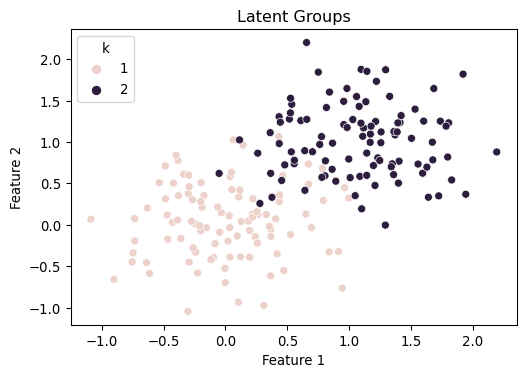

## k-means to Recover the Latent Groups

-   Run k-means with 2 clusters and check the results
-   If correlation is close to 1 then succesfully recovered the latent
    groups
-   If the correlation is close to -1 then it was succesful. The latent
    groups $\hat{k}$ numbers are ordered arbitrarily, just as $k$ was

In [27]:
kmeans = KMeans(n_clusters=2, random_state=0)
k_hat = kmeans.fit_predict(df[["f1", "f2"]])
df["k_hat"] = k_hat + 1
corr = df["k"].corr(df["k_hat"])
print(f"Correlation between k and k_hat:{corr:.2f}")

Correlation between k and k_hat:-0.84

/Users/jlperla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


## Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

# compute confusion matrix
cm = confusion_matrix(df["k"], df["k_hat"])

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

## Confusion Matrix

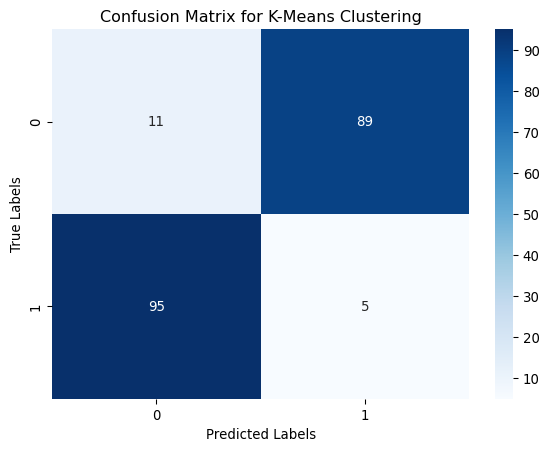

## Swap $\hat{k}$ and Compare

In [30]:
df['k_hat'] = df['k_hat'].replace({1: 2, 2: 1}) # swap for this example
print(f"Correlation now {df['k'].corr(df['k_hat'])}")
df['k_cluster'] = df.apply(lambda x: x['k'] if x['k'] == x['k_hat'] else 3, axis=1) # 3 if wrong
# Add text to display using latex
df['Cluster'] = df['k_cluster'].replace({1: r'$k=\hat{k}=1$',
                                         2: r'$k=\hat{k}=2$',
                                         3: r'$k \neq \hat{k}$'})

Correlation now 0.841516094685904

## Plotting the Uncovered Latent Groups

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x="f1", y="f2", hue="Cluster", ax=ax)
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="k-means Recovered Groups")
plt.show()

## Plotting the Uncovered Latent Groups

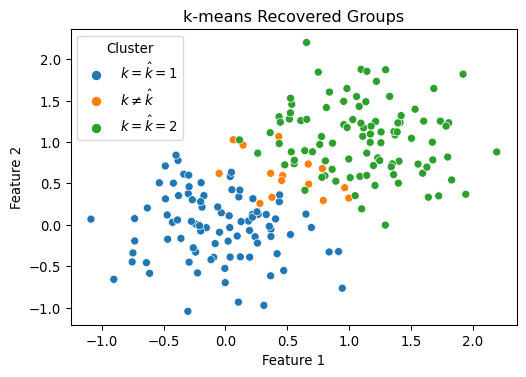

# (Optional) Matrix Conditioning and Stability

## Matrix Conditioning

-   Poorly conditioned matrices can lead to inaccurate or wrong
    solutions
-   Tends to happen when matrices are close to singular or when they
    have very different scales - so there will be times when you need to
    rescale your problems

In [33]:
eps = 1e-7
A = np.array([[1, 1], [1 + eps, 1]])
print(f"A =\n{A}")
print(f"A^{-1} =\n{inv(A)}")

A =
[[1.        1.       ]
 [1.0000001 1.       ]]
A^-1 =
[[-9999999.99336215  9999999.99336215]
 [10000000.99336215 -9999999.99336215]]

## Condition Numbers of Matrices

-   $\det(A) \approx 0$ may say it is “almost” singular, but it is not
    scale-invariant
-   $\text{cond}(A) \equiv ||A|| \cdot ||A^{-1}||$ where $||\cdot||$ is
    the matrix norm - expensive to calculate in practice. Connected to
    eigenvalues $\text{cond}(A) = |\frac{\lambda_{max}}{\lambda_{min}}|$
-   Scale free measure of numerical issues for a variety of matrix
    operations
-   Intuition: if $\text{cond}(A) = K$, then $b \to b + \nabla b$ change
    in $b$ amplifies to a $x \to x + K \nabla b$ error when solving
    $A x = b$.
-   See [Matlab Docs on
    inv](https://www.mathworks.com/help/matlab/ref/inv.html#bu6sfy8-1)
    for example, where `inv` is a bad idea due to poor conditioning

In [34]:
print(f"condition(I) = {cond(np.eye(2))}")
print(f"condition(A) = {cond(A)}, condition(A^(-1)) = {cond(inv(A))}")

condition(I) = 1.0
condition(A) = 40000001.939191714, condition(A^(-1)) = 40000002.00307444

## Example with Interpolation

-   Consider fitting data $x\in\mathbb{R}^{N+1}$ and
    $y\in\mathbb{R}^{N+1}$ with an $N$-degree polynomial
-   That is, find $c \in \mathbb{R}^{N+1}$ such that

$$
\begin{aligned}
c_0 + c_1 x_1 + c_2 x_1^2 + \ldots + c_N x_1^N &= y_1\\
\dots &= \dots\\
c_0 + c_1 x_N + c_2 x_N^2 + \ldots + c_N x_N^N &= y_N\\
\end{aligned}
$$

-   Which we can then use as $P(x) = \sum_{n=0}^N c_n x^n$ to
    interpolate between the points

## Writing as a Linear System

-   Define a matrix of all of the powers of the $x$ values

$$
A \equiv \begin{bmatrix}
1 & x_0 & x_0^2 & \ldots & x_0^N\\
\vdots & \vdots &\vdots & \vdots & \vdots\\
1 & x_N & x_N^2 & \ldots & x_N^N
\end{bmatrix}
$$

-   Then solve for $c$ as the solution to,

$$
A c = y
$$

-   Which we can solve using our tools. As long as $x_n$ are unique, it
    is $A$ is invertible
-   Let’s look at the numerical error here from the interpolation using
    the inf-norm, i.e., $||x||_{\infty} = \max_n |x_n|$

## Solving an Example

In [35]:
N = 5
x = np.linspace(0.0, 10.0, N + 1)
y = np.exp(x)  # example function to interpolate
A = np.array([[x_i**n for n in range(N + 1)] for x_i in x])  # or np.vander
c = solve(A, y)
c_inv = inv(A) @ y
print(f"error = {norm(A @ c - y, np.inf)}, \
error using inv(A) = {norm(A @ c_inv - y, np.inf)}")
print(f"cond(A) = {cond(A)}")

error = 2.2737367544323206e-11, error using inv(A) = 1.0986695997416973e-09
cond(A) = 564652.321404467

## Things Getting Poorly Conditioned Quickly

In [36]:
N = 10
x = np.linspace(0.0, 10.0, N + 1)
y = np.exp(x)  # example function to interpolate
A = np.array([[x_i**n for n in range(N + 1)] for x_i in x])  # or np.vander
c = solve(A, y)
c_inv = inv(A) @ y # Solving with inv(A) instead of solve(A, y)
print(f"error = {norm(A @ c - y, np.inf)}, \
error using inv(A) = {norm(A @ c_inv - y, np.inf)}")
print(f"cond(A) = {cond(A)}")

error = 6.348273018375039e-10, error using inv(A) = 4.55108965979889e-06
cond(A) = 4462823910804.094

## Matrix Inverses Fail Completely for $N = 20$

In [37]:
N = 20
x = np.linspace(0.0, 10.0, N + 1)
y = np.exp(x)  # example function to interpolate
A = np.array([[x_i**n for n in range(N + 1)] for x_i in x])  # or np.vander
c = solve(A, y)
c_inv = inv(A) @ y # Solving with inv(A) instead of solve(A, y)
print(f"error = {norm(A @ c - y, np.inf)}, \
error using inv(A) = {norm(A @ c_inv - y, np.inf)}")
print(f"cond(A) = {cond(A):.4g}")

error = 1.9554136088117957e-10, error using inv(A) = 21804.714723170073
cond(A) = 3.325e+24

/var/folders/_b/wxr61qmn5zz3y_9bsljkmlj80000gn/T/ipykernel_47789/1043797195.py:5: LinAlgWarning:

Ill-conditioned matrix (rcond=8.94779e-28): result may not be accurate.


## Moral of this Story

-   Use `solve`, which is faster and can often solve ill-conditioned
    problems. Rarely use `inv`, and only when you know the problem is
    well-conditioned
-   Check conditioning of matrices when doing numerical work as an
    occasional diagnostic, as it is a good indicator of potential
    problems and collinearity
-   For approximation, never use a monomial basis for polynomials
    -   Prefer polynomials like Chebyshev, which are designed to be as
        orthogonal as possible

In [38]:
N = 40
x = np.linspace(-1, 1, N+1)  # Or any other range of x values
A = np.array([[np.polynomial.Chebyshev.basis(n)(x_i) for n in range(N+1)] for x_i in x])
A_monomial = np.array([[x_i**n for n in range(N + 1)] for x_i in x])  # or np.vander
print(f"cond(A) = {cond(A):.4g}, cond(A_monimial) = {cond(A_monomial):.4g}")

cond(A) = 3.64e+09, cond(A_monimial) = 8.903e+17